In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import root

In [2]:
data1=pd.read_csv(r"ex2data1.txt",header=None)
data1

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


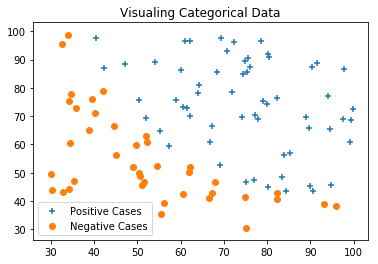

In [3]:
X=data1.ix[:,:1]
y=data1.ix[:,2]

pos = X.ix[y==1,:]

neg = X.ix[y==0,:]
pos_sct=plt.scatter(pos.ix[:,0].values,pos.ix[:,1].values,marker='+')
neg_sct=plt.scatter(neg.ix[:,0].values,neg.ix[:,1].values,marker='o')
plt.legend((pos_sct, neg_sct),
           ('Positive Cases', 'Negative Cases'),
           scatterpoints=1,
           loc='best')
plt.title('Visualing Categorical Data')
plt.show()

In [4]:
neg

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
5,45.083277,56.316372
10,95.861555,38.225278
11,75.013658,30.603263
14,39.538339,76.036811
17,67.946855,46.678574
20,67.372028,42.838438
22,50.534788,48.855812


[-24.    0.2   0.2]
exit at iter: 157
thetas: [-24.00014749   0.19693692   0.19208338]


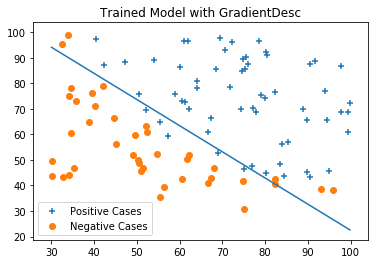

In [5]:
# 1.2 implementing gradient descent for logit regression

# inputs
n_obs=X.shape[0]
X[-1]=1 # add constant column
X=X.sort_index(axis=1)
n_factor=X.shape[1]
thetas=np.array([-24.,0.2,0.2]) 
print(thetas)

# logistic cost function
def logit_fn(z): # logistic(x)
    return 1./(1+np.exp(-z))
    
def regression_fn(thetas,x_matrix): # h(x)
    return logit_fn(x_matrix.dot(thetas))

def gradient_desc(thetas, x_matrix, y_vector, alpha=0.001): # J'(theta)
    m=x_matrix.shape[0]
    thetas_updated=thetas.copy()
    for i in range(len(thetas)):
#         print(i)
#         print(regression_fn(thetas,x_matrix))
        thetas_updated[i]=thetas[i]-alpha/m*np.sum((regression_fn(thetas,x_matrix)-y)*x_matrix.ix[:,i-1])
    return thetas_updated

n_iter=1000
float_thresh=0.000001
for i in range(n_iter):
    new_thetas = gradient_desc(thetas, X, y)
#     print(new_thetas)
    
    # stopping criteria
    if np.sum(np.abs(thetas-new_thetas))<float_thresh:
        print('exit at iter:',i)
        print('thetas:',new_thetas)
        break
        
    # simultaneously update all thetas
    for j in range(len(new_thetas)):
        thetas[j]=new_thetas[j]
    
    if i>n_iter-5: print(thetas)


x1s=np.linspace(min(X.ix[:,0]),max(X.ix[:,0]),100)
# x2s=np.linspace(min(X.ix[:,1]),max(X.ix[:,1]),100)
plt.plot(x1s, -thetas[1]/thetas[2]*x1s-thetas[0]/thetas[2]) # boundary function is X2 = -theta1/theta2 X1 - theta0/theta2
pos_sct=plt.scatter(pos.ix[:,0].values,pos.ix[:,1].values,marker='+')
neg_sct=plt.scatter(neg.ix[:,0].values,neg.ix[:,1].values,marker='o')
plt.legend((pos_sct, neg_sct),
           ('Positive Cases', 'Negative Cases'),
           scatterpoints=1,
           loc='best')
plt.title('Trained Model with GradientDesc')
plt.show()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 16
         Function evaluations: 110
         Gradient evaluations: 22
      fun: 0.20349770159250194
 hess_inv: array([[  3.38112807e+03,  -2.69799993e+01,  -2.73624376e+01],
       [ -2.69799993e+01,   2.29964991e-01,   2.05226826e-01],
       [ -2.73624376e+01,   2.05226826e-01,   2.37051282e-01]])
      jac: array([  0.00000000e+00,  -8.38190317e-07,  -6.98491931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 16
     njev: 22
   status: 0
  success: True
        x: array([-25.16119043,   0.20623056,   0.20147044])


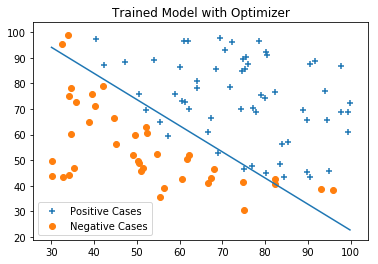

In [6]:
# 1.2 use minimization to find model - scipy.minimize
def logistic_cost_fn(thetas, x_matrix, y_vector): # J(theta)
    m=len(y_vector)
    return 1./m*np.sum(-y_vector*np.log(regression_fn(thetas,x_matrix))-(1-y_vector)*np.log(1-regression_fn(thetas,x_matrix)))

thetas_0=np.array([-24.,0.2,0.2]) 
cost_fn_opt=lambda xs: logistic_cost_fn(xs, X, y)
res =minimize(cost_fn_opt, thetas_0, options={'gtol': 1e-6, 'disp': True})
thetas_fitted=res.x
print(res)

# plot fitted line

x1s=np.linspace(min(X.ix[:,0]),max(X.ix[:,0]),100)
plt.plot(x1s, -thetas_fitted[1]/thetas_fitted[2]*x1s-thetas_fitted[0]/thetas_fitted[2]) # boundary function is X2 = -theta1/theta2 X1 - theta0/theta2
pos_sct=plt.scatter(pos.ix[:,0].values,pos.ix[:,1].values,marker='+')
neg_sct=plt.scatter(neg.ix[:,0].values,neg.ix[:,1].values,marker='o')
plt.legend((pos_sct, neg_sct),
           ('Positive Cases', 'Negative Cases'),
           scatterpoints=1,
           loc='best')
plt.title('Trained Model with Optimizer')
plt.show()

In [7]:
# 1.2.4 trained model (optimizer)
model=lambda xs: regression_fn(thetas_fitted,xs)
# checking model: exam 1=45, exam2=85, admin prob = 0.776
print('Model prediction: exam1=45, exam2=85, admin prob =', model(np.array([1,45,85])))

Model prediction: exam1=45, exam2=85, admin prob = 0.776289397218


In [8]:
def predict(thetas,x_vector):
    prob=regression_fn(thetas,x_vector)
    if prob>=0.5: return 1
    else: return 0

# run accuracy test using predict()
probs=[predict(thetas_fitted,X.iloc[i,:].values) for i in X.index]
binary_outcomes=[1 if p>=0.5 else 0 for p in probs]
print('Accuracy rate is :', np.mean(binary_outcomes==y), ', compared to given accuracy of 89%')

Accuracy rate is : 0.89 , compared to given accuracy of 89%


In [9]:
# 2. Regularized regression

data2=pd.read_csv(r"ex2data2.txt",header=None)
data2

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


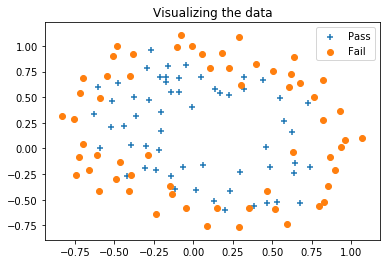

In [10]:
X=data2.ix[:,:1]
y=data2.ix[:,2]
pos=X.ix[y==1,:]
neg=X.ix[y==0,:]

pos_sct = plt.scatter(pos.ix[:,0],pos.ix[:,1],marker='+')
neg_sct = plt.scatter(neg.ix[:,0],neg.ix[:,1],marker='o')
plt.legend((pos_sct, neg_sct),
           ('Pass', 'Fail'),
           scatterpoints=1,
           loc='best')
plt.title('Visualizing the data')
plt.show()

In [11]:
# 2.2 Feature mapping (use up to the 5th polynomial powers of the two features)
def mapFeature(x1, x2):
    constant_vec=np.ones(len(x2))
    aug_x=np.array([constant_vec, 
     x1, x2, 
     x1**2, x1*x2,    x2**2,
     x1**3, x1**2*x2, x1*x2**2,    x2**3,
     x1**4, x1**3*x2, x1**2*x2**2, x1*x2**3, x2**4,
     x1**5, x1**4*x2, x1**3*x2**2, x1**2*x2**3, x1**1*x2**4, x2**5,
     x1**6, x1**5*x2, x1**4*x2**2, x1**3*x2**3, x1**2*x2**4, x1*x2**5, x2**6
     ])
    return pd.DataFrame(aug_x.T, columns=['cons', 'x', 'y',
                                       'x2','xy','y2',
                                       'x3','x2y','xy2','y3',
                                       'x4','x3y','x2y2','xy3','y4',
                                       'x5','x4y','x3y2','x2y3','xy4','y5',
                                       'x6','x5y','x4y2','x3y3','x2y4','xy5','y6'])

X_aug=mapFeature(X.ix[:,0], X.ix[:,1])
X_aug

,cons,x,y,x2,xy,y2,x3,x2y,xy2,y3,...,x2y3,xy4,y5,x6,x5y,x4y2,x3y3,x2y4,xy5,y6
0,1.0,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,3.423536e-01,...,8.998098e-04,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,1.0,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,3.213347e-01,...,2.763825e-03,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,1.0,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,3.317332e-01,...,1.515091e-02,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,1.0,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,1.266497e-01,...,1.781011e-02,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,1.0,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,1.009603e-01,...,2.659554e-02,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
5,1.0,-0.524770,0.209800,0.275384,-0.110097,0.044016,-1.445130e-01,0.057775,-0.023098,9.234565e-03,...,2.543047e-03,-1.016696e-03,4.064690e-04,2.088401e-02,-8.349308e-03,3.338005e-03,-1.334515e-03,5.335313e-04,-2.133027e-04,8.527719e-05
6,1.0,-0.398040,0.034357,0.158436,-0.013675,0.001180,-6.306380e-02,0.005443,-0.000470,4.055512e-05,...,6.425385e-06,-5.546100e-07,4.787141e-08,3.977043e-03,-3.432803e-04,2.963039e-05,-2.557560e-06,2.207569e-07,-1.905473e-08,1.644718e-09
7,1.0,-0.305880,-0.192250,0.093563,0.058805,0.036960,-2.861892e-02,-0.017987,-0.011305,-7.105572e-03,...,-6.648156e-04,-4.178462e-04,-2.626224e-04,8.190426e-04,5.147801e-04,3.235467e-04,2.033538e-04,1.278108e-04,8.033094e-05,5.048915e-05
8,1.0,0.016705,-0.404240,0.000279,-0.006753,0.163410,4.661648e-06,-0.000113,0.002730,-6.605685e-02,...,-1.843363e-05,4.460706e-04,-1.079435e-02,2.173096e-11,-5.258619e-10,1.272520e-08,-3.079338e-07,7.451610e-06,-1.803196e-04,4.363507e-03
9,1.0,0.131910,-0.513890,0.017400,-0.067787,0.264083,2.295267e-03,-0.008942,0.034835,-1.357096e-01,...,-2.361380e-03,9.199376e-03,-3.583858e-02,5.268249e-06,-2.052385e-05,7.995603e-05,-3.114897e-04,1.213490e-03,-4.727468e-03,1.841709e-02


In [12]:
# 2.3 cost function and gradient
def reg_cost_fn(thetas, lamb, x_matrix, y_vector):
    m=len(y_vector)
    # note not regularizing theta[0]!!
    return 1./m*np.sum(-y_vector*np.log(regression_fn(thetas,x_matrix))-(1-y_vector)*np.log(1-regression_fn(thetas,x_matrix)))+lamb/(2.*m)*np.sum(thetas[:-1]**2)

def reg_grad(thetas, lamb, x_matrix, y_vector): # return all gradients
    m=len(y_vector)
    gradients=[]
    for i in range(len(x_matrix.columns)):
        if i==0:    # note not regularizing theta[0]!!
            gradients.append(1./m*np.sum((regression_fn(thetas,x_matrix)-y)*x_matrix.ix[:,i]))
        else:
            gradients.append(1./m*np.sum((regression_fn(thetas,x_matrix)-y)*x_matrix.ix[:,i])+lamb/m*thetas[i])
    return np.array(gradients)
   
def reg_grad_desc(thetas, lamb, x_matrix, y_vector, alpha=0.01):
    m=len(y_vector)
    new_thetas=thetas.copy()
    for i in range(len(x_matrix.columns)):
        if i==0:    # note not regularizing theta[0]!!
            new_thetas[i]=thetas[i]-alpha/m*np.sum((regression_fn(thetas,x_matrix)-y)*x_matrix.ix[:,i])
        else:
            new_thetas[i]=thetas[i]-alpha*(1./m*np.sum((regression_fn(thetas,x_matrix)-y)*x_matrix.ix[:,i])+lamb/m*thetas[i])
    return np.array(new_thetas)


# set up
np.set_printoptions(precision=4,suppress=True)
thetas_0=np.array([0]*X_aug.shape[1])
lamb=1. # initialize regularization parameter
# cost and gradient test case 1
print('initial thetas',thetas_0) 
print('initial cost',reg_cost_fn(thetas_0,lamb,X_aug,y)) # expected 0.693
print('initial gradient',reg_grad(thetas_0,lamb,X_aug,y))
thetas_0=np.array([1.]*X_aug.shape[1])
lamb=10. # initialize regularization parameter
# cost and gradient test case 2
print('test thetas',thetas_0)
print('cost at test thetas',reg_cost_fn(thetas_0,lamb,X_aug,y)) # expected 3.16
print('gradient at test thetas',reg_grad(thetas_0,lamb,X_aug,y))

# # run grad desc
# num_iter=1000
# for j in range(num_iter):
#     new_thetas=reg_grad_desc(thetas_0,lamb,X_aug,y)
#     # stopping condition
#     if np.sum(new_thetas-thetas)<float_thresh:
#         print('exit at iter:',j)
#         break
#     thetas_0=new_thetas

# print('trained model is:',thetas)    

initial thetas [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
initial cost 0.69314718056
initial gradient [ 0.0085  0.0188  0.0001  0.0503  0.0115  0.0377  0.0184  0.0073  0.0082
  0.0235  0.0393  0.0022  0.0129  0.0031  0.0393  0.02    0.0043  0.0034
  0.0058  0.0045  0.031   0.031   0.0011  0.0063  0.0004  0.0073  0.0014
  0.0388]
test thetas [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
cost at test thetas 3.16450933162
gradient at test thetas [ 0.346   0.1614  0.1948  0.2269  0.0922  0.2444  0.1434  0.1084  0.1023
  0.1835  0.1735  0.0873  0.1182  0.0858  0.1999  0.1352  0.095   0.0936
  0.0998  0.0914  0.1749  0.1496  0.0868  0.099   0.0853  0.1019  0.0845
  0.1823]


In [13]:
# 2.3.1 use optimizer to find model
thetas_0=np.array([0.]*X_aug.shape[1])
lamb=1. # initialize regularization parameter
opt_cost_fn=lambda params: reg_cost_fn(params, lamb, X_aug, y)
res = minimize(opt_cost_fn,thetas_0, options={'disp': True})
print('trained first 5 thetas',res.x[:5])

Optimization terminated successfully.
         Current function value: 0.513406
         Iterations: 65
         Function evaluations: 1980
         Gradient evaluations: 66
trained first 5 thetas [ 1.1341  0.6222  1.1656 -1.9699 -0.9985]


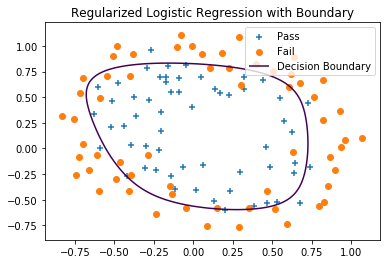

In [14]:
# 2.4 plotting decision boundary
trained_thetas=res.x
linear_model=lambda x1, x2: mapFeature(x1,x2).dot(trained_thetas)
x1s=np.linspace(min(X.ix[:,0]),max(X.ix[:,0]),100)
x2s=np.linspace(min(X.ix[:,1]),max(X.ix[:,1]),100)

plt.figure()
x1_coord, x2_coord = np.meshgrid(x1s, x2s)
zs=np.array([linear_model(i,j) for i,j in zip(x1_coord, x2_coord)])
# print(zs.shape)

pos_sct = plt.scatter(pos.ix[:,0],pos.ix[:,1],marker='+')
neg_sct = plt.scatter(neg.ix[:,0],neg.ix[:,1],marker='o')
CS = plt.contour(x1_coord, x2_coord, zs.reshape(x1_coord.shape), levels=[0])
plt.legend([pos_sct, neg_sct, CS.collections[0]],
           ['Pass', 'Fail','Decision Boundary'],
          loc='best')
plt.title('Regularized Logistic Regression with Boundary')
plt.show()


In [15]:
# 2.5 (optional) classification model with varying regularization parameters
lambs=[0., 1., 100.]
thetas_0=np.array([0.]*X_aug.shape[1])
def train_model(lamb, X_aug, y, params,plot=1):
    opt_cost_fn=lambda params: reg_cost_fn(params, lamb, X_aug, y)
    res = minimize(opt_cost_fn,thetas_0, options={'disp': True})
    trained_thetas=res.x
    linear_model=lambda x1, x2: mapFeature(x1,x2).dot(trained_thetas)
    x1s=np.linspace(min(X.ix[:,0]),max(X.ix[:,0]),100)
    x2s=np.linspace(min(X.ix[:,1]),max(X.ix[:,1]),100)
    if plot==1:
        plt.figure()
        x1_coord, x2_coord = np.meshgrid(x1s, x2s)
        zs=np.array([linear_model(i,j) for i,j in zip(x1_coord, x2_coord)])
        # print(zs.shape)

        pos_sct = plt.scatter(pos.ix[:,0],pos.ix[:,1],marker='+')
        neg_sct = plt.scatter(neg.ix[:,0],neg.ix[:,1],marker='o')
        CS = plt.contour(x1_coord, x2_coord, zs.reshape(x1_coord.shape), levels=[0])
        plt.legend([pos_sct, neg_sct, CS.collections[0]],
                   ['Pass', 'Fail','Decision Boundary'],
                  loc='best')
        plt.title('Regularized Logistic Regression with Boundary Param=%d' % lamb)
        plt.show()
    return trained_thetas

Optimization terminated successfully.
         Current function value: 0.224548
         Iterations: 586
         Function evaluations: 17790
         Gradient evaluations: 593


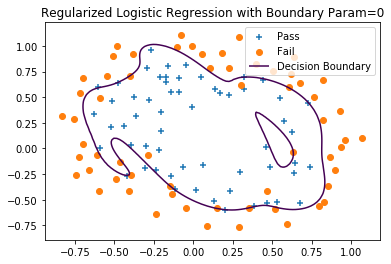

array([   35.0652,    44.0607,    69.2412,  -343.8919,  -197.918 ,
        -184.0503,  -295.3951,  -621.1795,  -510.4878,  -328.3573,
        1093.3909,  1267.5996,  1755.8369,   899.8167,   436.3841,
         470.3945,  1234.7313,  1821.2138,  1929.0945,  1131.0457,
         464.1517, -1140.687 , -2017.9436, -3459.4408, -3480.8236,
       -3250.5229, -1545.4822,  -510.6455])

In [16]:
train_model(lambs[0],X_aug, y,thetas_0)

Optimization terminated successfully.
         Current function value: 0.513406
         Iterations: 65
         Function evaluations: 1980
         Gradient evaluations: 66


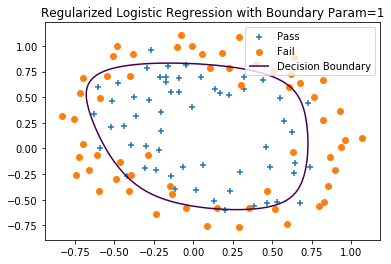

array([ 1.1341,  0.6222,  1.1656, -1.9699, -0.9985, -0.565 ,  0.1413,
       -0.4558, -0.379 ,  0.3791, -1.4586, -0.0452, -0.601 , -0.3952,
       -0.255 , -0.2291, -0.2446, -0.0435, -0.2699, -0.3592,  0.2856,
       -1.0434,  0.0383, -0.3067,  0.0012, -0.2737, -0.2657, -6.0067])

In [17]:
train_model(lambs[1],X_aug, y,thetas_0)

Optimization terminated successfully.
         Current function value: 0.650465
         Iterations: 13
         Function evaluations: 420
         Gradient evaluations: 14


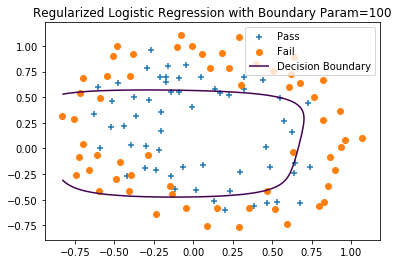

array([ 0.0532, -0.0175,  0.0492, -0.0504, -0.016 ,  0.0089, -0.0183,
       -0.0036, -0.0099,  0.0181, -0.0427, -0.0027, -0.0095, -0.0058,
        0.0015, -0.0211, -0.0038, -0.0035, -0.0026, -0.0064,  0.0077,
       -0.0343, -0.0011, -0.0059, -0.0007, -0.0041, -0.0035, -2.685 ])

In [18]:
train_model(lambs[2],X_aug, y,thetas_0)